In [49]:
# imports
from camo_worms_utils import *
from random import shuffle
from itertools import product
from scipy.spatial.distance import dist

ImportError: cannot import name 'dist' from 'scipy.spatial.distance' (C:\Users\evste\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\spatial\distance.py)

In [26]:
def get_cost_v1(image, worm_idx: int, clew: list[Camo_Worm], w_internal, w_group, w_environment):
    worm = clew[worm_idx]

    count = 0
    for i in range(len(clew)):
        if i is not worm_idx:
            # base off of three intermediate points
            # i.e. add one to count if any points are too close
            points_worm = worm.intermediate_points(math.ceil(worm.approx_length() / worm.width))
            points_other = clew[i].intermediate_points(math.ceil(clew[i].approx_length() / clew[i].width))
            
            touching = False
            for point_worm in points_worm:
                if touching:
                    count += 1
                    break
                for point_other in points_other:
                    euclid_dist = np.linalg.norm(
                        np.array(point_worm)-np.array(point_other)
                    )
                    # print(f"Points {point_worm}, {point_other}")
                    # print(f"Widths {worm.width}, {clew[i].width}")
                    # print(f"Dist {euclid_dist}\n")
                    if euclid_dist < worm.width + clew[i].width:
                        touching = True
                        break
    proportion = count/(len(clew)-1)
    # print(f"Count: {count}\nProportion: {proportion}")
    return

In [94]:
def get_cost_v2(image, worm_idx: int, clew: list[Camo_Worm], w_internal, w_group, w_environment):
    worm = clew[worm_idx]

    count = 0
    for i in range(len(clew)):
        if i is not worm_idx:
            # base off of three intermediate points
            # i.e. add one to count if any points are too close
            points_worm = worm.intermediate_points(math.ceil(worm.approx_length() / worm.width))
            points_other = clew[i].intermediate_points(math.ceil(clew[i].approx_length() / clew[i].width))
            
            combos = list(product(points_worm, points_other))

            for point_worm, point_other in combos:
                euclid_dist = np.linalg.norm(
                    np.array(point_worm)-np.array(point_other)
                )
                # print(f"Points {point_worm}, {point_other}")
                # print(f"Widths {worm.width}, {clew[i].width}")
                # print(f"Dist {euclid_dist}\n")
                if euclid_dist < worm.width + clew[i].width:
                    # theyre touching
                    count += 1
                    break
    proportion = count/(len(clew)-1)
    print(f"Count: {count}\nProportion: {proportion}")
    return

In [95]:
def get_cost_v3(image, worm_idx: int, clew: list[Camo_Worm], w_internal, w_group, w_environment):
    worm = clew[worm_idx]

    count = 0
    for i in range(len(clew)):
        if i is not worm_idx:
            # base off of three intermediate points
            # i.e. add one to count if any points are too close
            points_worm = worm.intermediate_points()
            points_other = clew[i].intermediate_points()
            
            combos = list(product(points_worm, points_other))
            points_worm = []
            points_other = []
            for point_worm, point_other in combos:
                points_worm += [point_worm]
                points_other += [point_other]

            dists = cdist(points_worm, points_other)
            if np.min(dists) < worm.width + clew[i].width:
                count += 1
    proportion = count/(len(clew)-1)
    print(f"Count: {count}\nProportion: {proportion}")
    return

Image name (shape) (intensity max, min, mean, std)

original (240, 720) (210, 0, 49.3, 34.8)


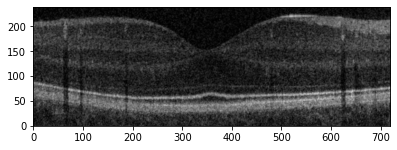

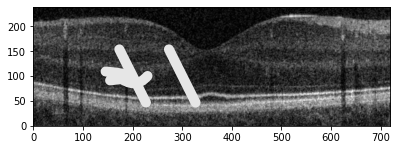

Count: 2
Proportion: 0.6666666666666666


In [100]:
img = prep_image(IMAGE_DIR, IMAGE_NAME, MASK)
worm1 = Camo_Worm(200, 100, 30, 0, 30, 30, 10, 0.9)
worm2 = Camo_Worm(200, 100, 60, 90, 0, 0, 10, 0.9)
worm3 = Camo_Worm(300, 100, 60, 90, 0, 0, 10, 0.9)
worm4 = Camo_Worm(150, 100, 10, 90, 90, -90, 10, 0.9)
clew = [worm1, worm2, worm3, worm4]
drawing = Drawing(img)
drawing.add_worms(clew)
drawing.show()

get_cost_v2(img, 0, clew, 1, 1, 1)

In [88]:
%timeit points_worm = worm1.intermediate_points(math.ceil(worm1.approx_length() / worm1.width))
points_other = worm2.intermediate_points(math.ceil(worm2.approx_length() / worm2.width))

%timeit combos = list(product(points_worm, points_other))

combos = list(product(points_worm, points_other))
points_worm = []
points_other = []
for point_worm, point_other in combos:
    points_worm += [point_worm]
    points_other += [point_other]

%timeit dists = cdist(points_worm, points_other)

335 µs ± 47.6 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
176 ms ± 35.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


MemoryError: Unable to allocate 22.1 TiB for an array with shape (1741824, 1741824) and data type float64

Image name (shape) (intensity max, min, mean, std)

original (240, 720) (210, 0, 49.3, 34.8)


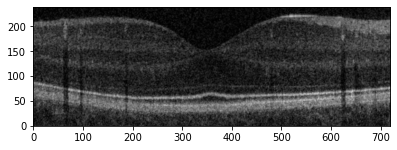

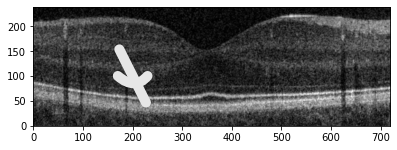

722 µs ± 102 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
677 µs ± 16.9 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
650 µs ± 16.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [76]:
img = prep_image(IMAGE_DIR, IMAGE_NAME, MASK)
worm1 = Camo_Worm(200, 100, 30, 0, 30, 30, 10, 0.9)
worm2 = Camo_Worm(200, 100, 60, 90, 0, 0, 10, 0.9)
drawing = Drawing(img)
drawing.add_worms([worm1, worm2])
drawing.show()

%timeit get_cost_v1(img, 0, [worm1, worm2], 1, 1, 1)
%timeit get_cost_v2(img, 0, [worm1, worm2], 1, 1, 1)
%timeit get_cost_v3(img, 0, [worm1, worm2], 1, 1, 1)